# Opdracht Centrum- en spreidingsmaten

In [1]:
%matplotlib inline
from pandas import *
from statistics import mode
from scipy.stats import iqr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
# Setting custom colors for the charts
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

dataset = pd.read_csv('StudentsPerformance.csv')
dataset.head(10)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group_B,bachelor's degree,standard,none,72,72,74
1,female,group_C,some college,standard,completed,69,90,88
2,female,group_B,master's degree,standard,none,90,95,93
3,male,group_A,associate's degree,free/reduced,none,47,57,44
4,male,group_C,some college,standard,none,76,78,75
5,female,group_B,associate's degree,standard,none,71,83,78
6,female,group_B,some college,standard,completed,88,95,92
7,male,group_B,some college,free/reduced,none,40,43,39
8,male,group_D,high school,free/reduced,completed,64,64,67
9,female,group_B,high school,free/reduced,none,38,60,50


### Conclusies dataset:
Vooral de waarden math_score, reading_score en writing_score zijn de discrete, kwantitatieve gegevens
Verder zijn de andere velden vooral nominale, kwalitatieve gegevens die we kunnen gebruiken om groepen te vergelijken

Bepaal het totaal aantal studenten

In [3]:
# Totaal aantal studenten
print('Aantal studenten in de dataset:', len(dataset))

Aantal studenten in de dataset: 1000


Hoeveel studenten zijn niet geslaagd (score lager dan 50) voor wiskunde? Vergelijk ook per geslacht.

In [4]:
# Aantal studenten die niet geslaagd zijn voor wiskunde + aantal mannen / vrouwen niet geslaagd voor wiskunde
print('Aantal studenten dat niet slaagde voor wiskunde:', len(dataset[dataset.math_score < 50]))
math_gender_group = dataset[dataset.math_score < 50].groupby(["gender"])["gender"].count()
print('Aantal studenten dat niet slaagde voor wiskunde, per geslacht:')
print(str(math_gender_group))

Aantal studenten dat niet slaagde voor wiskunde: 135
Aantal studenten dat niet slaagde voor wiskunde, per geslacht:
gender
female    86
male      49
Name: gender, dtype: int64


Bepaal de verdeling tussen het aantal vrouwen en mannen. Met andere woorden bepaal het aantal mannen en het aantal vrouwen. Geef deze verdeling weer via een staafdiagram. Gebruik daarvoor de Matplotlib (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) of de Seaborn library (https://seaborn.pydata.org/api.html). Gebruik bij Seaborn de catplot (categorical plot).

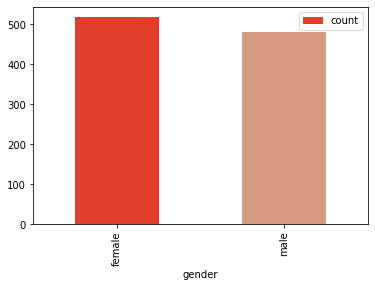

In [5]:
# Verdeling tussen mannen en vrouwen +  staafdiagram (bar chart)
# Group by gender and set name of count column
gender_grouped_df  = dataset.groupby(['gender'])['gender'].count().reset_index(name="count")
# Plot with Matplotlib
gender_grouped_df.plot(x='gender', y='count', kind='bar', color=colors)

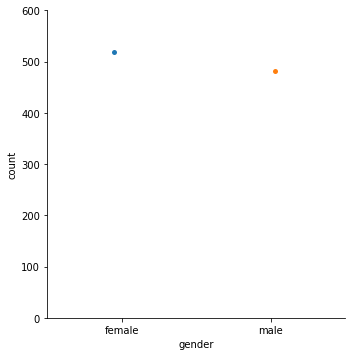

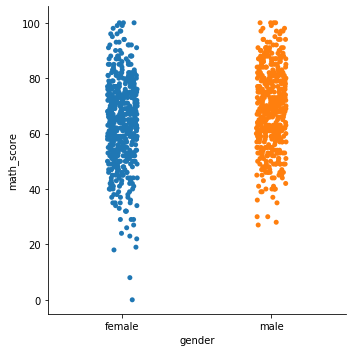

In [6]:
# Plot with Seaborn, but showing the scores for math by gender
ax = sns.catplot(x='gender', y='count', data=gender_grouped_df)
ax.set(ylim=(0, 600))
# Just the seperation between male/female (two dots)
sns.catplot(x='gender', y='math_score', data=dataset)


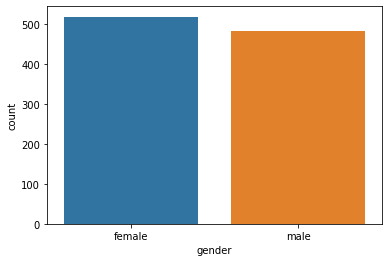

In [7]:
# Verdeling tussen mannen en vrouwen in staafgrafiek
sns.barplot(x='gender', y='count', data=gender_grouped_df.astype({"gender": str, "count": int}))

Bepaal de verdeling van de etniciteiten. Visualiseer met een taartdiagram (pie chart). Gebruik hiervoor plt.pie() https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py.
Om de aantallen van elke categorie te bepalen kan je gebruik maken van https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html


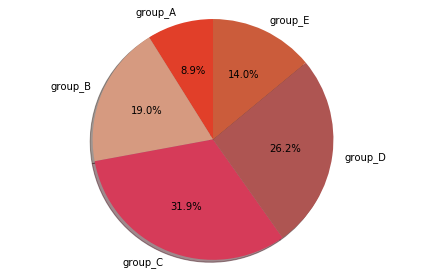

In [8]:
# Verdeling van de etniciteiten + taartdiagram (pie chart)
dataset.head(10)
# Performing a count (and adding the count column with reset_index)
ethnicity_count = dataset.groupby(['ethnicity'])['ethnicity'].count().reset_index(name="count")
# Create a pie chart
plt.pie(
    # using data total)arrests
    ethnicity_count['count'],
    # with the labels being officer names
    labels=ethnicity_count['ethnicity'],
    # with shadows
    shadow=True,
    # with colors
    colors=colors,
    # optionally with one slide exploded out
    # explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

Maak van zowel de math_score, reading_score en writing_score een apart histogram. Bepaal eerst de klassebreedte, verdeel daarna in klasses en maak een plot van het histogram gecombineerd met de cumulatieve frequentie.


Klassebreedte bepaald op  3.1622776601683795


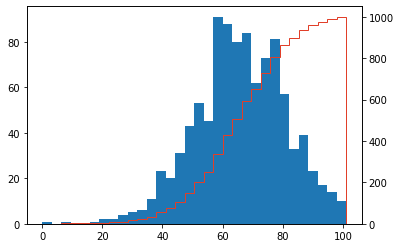

In [9]:
# Histogram van math_score 
math_scores = dataset['math_score']
bin_width = (max(math_scores)-min(math_scores)) / math.sqrt(len(math_scores))
bins = np.arange(min(math_scores), max(math_scores) + bin_width, bin_width) # set bins, using the np.arrange
print('Klassebreedte bepaald op ', bin_width)

fig, ax = plt.subplots(ncols=1)
cumulative_x_graph = ax.twinx()
# Plot histogram with bins on graph
ax.hist(
    dataset['math_score'],
    # Bins can be specified, otherwise the Freedman-diaconis rule is used
    bins = bins,
    cumulative = False,
    histtype='stepfilled'
);
# Plot cumulative graph as well
cumulative_x_graph.hist(
    dataset['math_score'],
    # Bins can be specified, otherwise the Freedman-diaconis rule is used
    bins = bins,
    cumulative = True,
    histtype='step',
    color=colors[0]
);


Klassebreedte bepaald op  2.6246904579397548


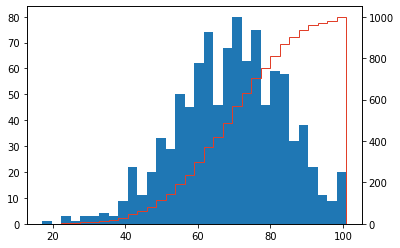

In [10]:
# Histogram van reading_score
reading_scores = dataset['reading_score']
bin_width = (max(reading_scores)-min(reading_scores)) / math.sqrt(len(reading_scores))
bins = np.arange(min(reading_scores), max(reading_scores) + bin_width, bin_width) # set bins, using the np.arrange
print('Klassebreedte bepaald op ', bin_width)

fig, ax = plt.subplots(ncols=1)
cumulative_x_graph = ax.twinx()
# Plot histogram with bins on graph
ax.hist(
    dataset['reading_score'],
    # Bins can be specified, otherwise the Freedman-diaconis rule is used
    bins = bins,
    cumulative = False,
    histtype='stepfilled'
);
# Plot cumulative graph as well
cumulative_x_graph.hist(
    dataset['reading_score'],
    # Bins can be specified, otherwise the Freedman-diaconis rule is used
    bins = bins,
    cumulative = True,
    histtype='step',
    color=colors[0]
);

Klassebreedte bepaald op  2.8460498941515415


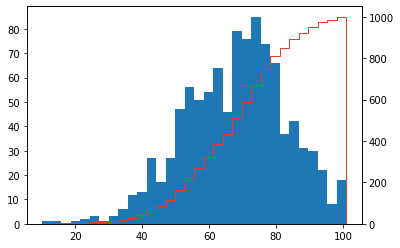

In [11]:
# Histogram van writing_score
writing_scores = dataset['writing_score']
bin_width = (max(writing_scores)-min(writing_scores)) / math.sqrt(len(writing_scores))
bins = np.arange(min(writing_scores), max(writing_scores) + bin_width, bin_width) # set bins, using the np.arrange
print('Klassebreedte bepaald op ', bin_width)

fig, ax = plt.subplots(ncols=1)
cumulative_x_graph = ax.twinx()
# Plot histogram with bins on graph
ax.hist(
    dataset['writing_score'],
    # Bins can be specified, otherwise the Freedman-diaconis rule is used
    bins = bins,
    cumulative = False,
    histtype='stepfilled'
);
# Plot cumulative graph as well
cumulative_x_graph.hist(
    dataset['writing_score'],
    # Bins can be specified, otherwise the Freedman-diaconis rule is used
    bins = bins,
    cumulative = True,
    histtype='step',
    color=colors[0]
);

Bepaal de van de bovenstaande histogrammen (math_score, reading_score en writing_score) de skew en de kurtosis.
Wat kan je daaruit besluiten. Komt dit overeen met de histogrammen?

In [12]:
# Skew en Kurtosis, printed as dataframe
output_list = [
                ['', 'Math', 'Reading', 'Writing'],
                ['Skew', math_scores.skew(), reading_scores.skew(), writing_scores.skew()],
                ['Kurtosis', math_scores.kurtosis(), reading_scores.kurtosis(), writing_scores.kurtosis()]
              ]
print(DataFrame(output_list))


          0         1          2          3
0                Math    Reading    Writing
1      Skew -0.278935  -0.259105  -0.289444
2  Kurtosis  0.274964 -0.0682655 -0.0333646


### Conclusies scheefheid & kurtosis:
We zien dat alle scores linksscheef zijn, wat perfect logisch is, aangezien de meerderheid van de studenten inderdaad slaagt voor hun examens.
We zien bij de wiskunde wel een sterkere piekvorming (leptokurtic), terwijl de andere scores bijna perfect normaal verdeeld lijken.  Dat is ook zichtbaar als de verschillende plots vergeleken worden.

Bepaal de centrummaten (gemiddelde, mediaan en de modus of modale klasse) van math_score, reading_score en writing_score telkens opgesplitst per geslacht.

In [13]:
#Centrummaten van math_score, reading_score en writing_score
print('Mean / average')
print(dataset.groupby('gender')['math_score','reading_score','writing_score'].mean())
print()
print('Median')
print(dataset.groupby('gender')['math_score','reading_score','writing_score'].median())
print()
# As mode does not seem to be supported on a groupby dataframe, let's calculate them one by one
female_data = dataset.loc[dataset['gender'] == 'female']
male_data = dataset.loc[dataset['gender'] == 'male']
print('Mode list')
mode_list = [
                ['', 'math_score', 'reading_score', 'writing_score'],
                ['female', list(female_data['math_score'].mode()), list(female_data['reading_score'].mode()), list(female_data['writing_score'].mode())],
                ['male', list(male_data['math_score'].mode()), list(male_data['reading_score'].mode()), list(male_data['writing_score'].mode())]
            ]
print(DataFrame(mode_list))

Mean / average
        math_score  reading_score  writing_score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203

Median
        math_score  reading_score  writing_score
gender                                          
female          65             73             74
male            69             66             64

Mode list
        0           1              2              3
0          math_score  reading_score  writing_score
1  female        [65]           [72]           [70]
2    male        [62]       [66, 74]           [68]


Bepaal de spreidingsmaten (variantie, standaardafwijking, range, interkwartielafstand) van math_score, reading_score en writing_score telkens opgesplitst per geslacht.


In [14]:
#Spreidingsmaten van math_score, reading_score en writing_score
print('Variance')
print(dataset.groupby('gender')['math_score','reading_score','writing_score'].var())
print()
print('Standard deviation')
print(dataset.groupby('gender')['math_score','reading_score','writing_score'].std())
print()
print('Range')
range_list = [
                ['', 'math_score', 'reading_score', 'writing_score'],
                ['female', max(female_data['math_score'])-min(female_data['math_score']), max(female_data['reading_score'])-min(female_data['reading_score']),max(female_data['writing_score'])-min(female_data['writing_score'])],
                ['male', max(male_data['math_score'])-min(male_data['math_score']), max(male_data['reading_score'])-min(male_data['reading_score']),max(male_data['writing_score'])-min(male_data['writing_score'])]
            ]
print(DataFrame(range_list))
print()
print('IQR')
iqr_list = [
                ['', 'math_score', 'reading_score', 'writing_score'],
                ['female', iqr(female_data['math_score']), iqr(female_data['reading_score']),iqr(female_data['writing_score']),],
                ['male', iqr(male_data['math_score']), iqr(male_data['reading_score']),iqr(male_data['writing_score']),]
            ]
print(DataFrame(iqr_list))


Variance
        math_score  reading_score  writing_score
gender                                          
female  239.985124     206.733938     220.369327
male    206.102695     194.095945     199.200248

Standard deviation
        math_score  reading_score  writing_score
gender                                          
female   15.491453      14.378245      14.844842
male     14.356277      13.931832      14.113832

Range
        0           1              2              3
0          math_score  reading_score  writing_score
1  female         100             83             90
2    male          73             77             85

IQR
        0           1              2              3
0          math_score  reading_score  writing_score
1  female          20          19.75             18
2    male          20             19          20.75


Je kan de via de pandas describe functie een overzicht genereren van de belangrijkste statistische parameters. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
Voer deze functie uit en vergelijk met de waarden die je via de aparte functie voor het bepalen van de verschillende centrum- en spreidingsmaten bekomen bent. Splits ook hier weer op per geslacht.

In [15]:
# pandas describe functie
dataset.groupby('gender').describe()

math_score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading_score             ...              writing_score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

Maak boxplots waarbij je telkens de verschillende score (math_score, reading_score en writing_score) vergelijkt tussen mannen en vrouwen.
Kan je besluiten dat mannen of vrouwen beter scoren op bepaalde testen? Beargumenteer.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97006ad990>,
      dtype=object)

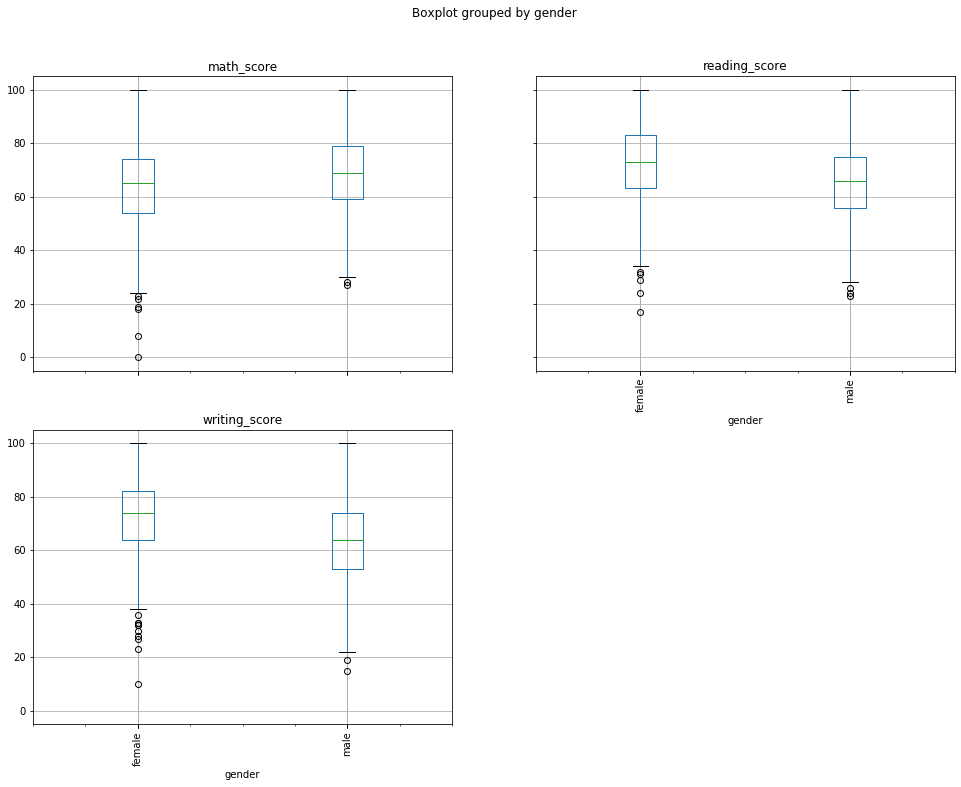

In [16]:
# Boxplots
dataset.boxplot(
    column = ['math_score', 'reading_score', 'writing_score'],
    by='gender',
    rot = 90,
    figsize = [16,12]
)

### Besluiten scores per geslacht:
Het lijkt hier dat de vrouwelijke deelnemers beter scoren tov de mannelijke deelnemers op gebied van taal (reading & writing), terwijl mannelijke deelnemers het vooral op wiskunde beter lijken te doen.  Verder lijken er wel meer negatieve outliers te zijn bij de vrouwelijke kandidaten, die uiteraard bepaalde conclusies zouden kunnen beïnvloeden.

Ga na of er bij math_score, reading_score en writing_score uitschieters te vinden zijn. 
- Gebruik enerzijds de methode via de interkwartielafstand (IQR). Waarden boven $Q_3 +1,5 \times IQR$ en waarden onder $Q_1 - 1,5 \times IQR$ kan je als uitschieters beschouwen.
- Bepaal ook uitschieters door te kijken welke waarden meer dan drie standaardafwijkingen van het gemiddelde gelegen zijn.

In [17]:
# Bepalen van uitschieters
def print_iqr_outliers(data_series, text):
    iqr_value = iqr(data_series)
    q3_value = data_series.quantile(.75)
    q1_value = data_series.quantile(.25)
    print(text)
    print(data_series[(data_series > q3_value + (1.5 * iqr_value)) | (data_series < q1_value - (1.5 * iqr_value))])
    print()

print_iqr_outliers(dataset['math_score'][dataset['gender']=='female'], 'IQR Outliers for female math scores')
print_iqr_outliers(dataset['reading_score'][dataset['gender']=='female'], 'IQR Outliers for female reading scores')
print_iqr_outliers(dataset['writing_score'][dataset['gender']=='female'], 'IQR Outliers for female writing scores')
print_iqr_outliers(dataset['math_score'][dataset['gender']=='male'], 'IQR Outliers for male math scores')
print_iqr_outliers(dataset['reading_score'][dataset['gender']=='male'], 'IQR Outliers for male reading scores')
print_iqr_outliers(dataset['writing_score'][dataset['gender']=='male'], 'IQR Outliers for male writing scores')


IQR Outliers for female math scores
17     18
59      0
145    22
787    19
842    23
980     8
Name: math_score, dtype: int64

IQR Outliers for female reading scores
17     32
59     17
466    31
601    29
980    24
Name: reading_score, dtype: int64

IQR Outliers for female writing scores
17     28
59     10
145    33
338    27
363    32
555    33
601    30
787    32
842    36
980    23
Name: writing_score, dtype: int64

IQR Outliers for male math scores
91     27
327    28
Name: math_score, dtype: int64

IQR Outliers for male reading scores
76     26
327    23
596    24
Name: reading_score, dtype: int64

IQR Outliers for male writing scores
327    19
596    15
Name: writing_score, dtype: int64



In [18]:
# Bepalen van uitschieters
def print_std_outliers(data_series, text):
    stddev = data_series.std()
    average = data_series.mean()
    print(text)
    print(data_series[(data_series > average + (3 * stddev)) | (data_series < average - (3 * stddev))])
    print()

print_std_outliers(dataset['math_score'][dataset['gender']=='female'], 'StdDev Outliers for female math scores')
print_std_outliers(dataset['reading_score'][dataset['gender']=='female'], 'StdDev Outliers for female reading scores')
print_std_outliers(dataset['writing_score'][dataset['gender']=='female'], 'StdDev Outliers for female writing scores')
print_std_outliers(dataset['math_score'][dataset['gender']=='male'], 'StdDev Outliers for male math scores')
print_std_outliers(dataset['reading_score'][dataset['gender']=='male'], 'StdDev Outliers for male reading scores')
print_std_outliers(dataset['writing_score'][dataset['gender']=='male'], 'StdDev Outliers for male writing scores')

StdDev Outliers for female math scores
59     0
980    8
Name: math_score, dtype: int64

StdDev Outliers for female reading scores
59     17
601    29
980    24
Name: reading_score, dtype: int64

StdDev Outliers for female writing scores
59     10
338    27
980    23
Name: writing_score, dtype: int64

StdDev Outliers for male math scores
Series([], Name: math_score, dtype: int64)

StdDev Outliers for male reading scores
327    23
Name: reading_score, dtype: int64

StdDev Outliers for male writing scores
327    19
596    15
Name: writing_score, dtype: int64

